In [1]:
clear()

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import os

In [3]:
os.chdir('/Users/ericwang/Desktop/ECON_148/L4.5/full_data')

### Useful tool 1: normalizing data

In [4]:
data = pd.read_csv("pulse2022_puf_51.csv")
print( 'Data set size: ', len( data ) )
data['TBIRTH_YEAR'].describe()

Data set size:  61453


count    61453.000000
mean      1970.926855
std         16.440226
min       1934.000000
25%       1957.000000
50%       1970.000000
75%       1985.000000
max       2004.000000
Name: TBIRTH_YEAR, dtype: float64

In [5]:
data_scaled=data.copy()
data_scaled['TBIRTH_YEAR'] = (data_scaled['TBIRTH_YEAR'] - data_scaled['TBIRTH_YEAR'].min()) / (data_scaled['TBIRTH_YEAR'].max() - data_scaled['TBIRTH_YEAR'].min()) 
data_scaled['TBIRTH_YEAR'].describe()

count    61453.000000
mean         0.527526
std          0.234860
min          0.000000
25%          0.328571
50%          0.514286
75%          0.728571
max          1.000000
Name: TBIRTH_YEAR, dtype: float64

(array([ 940., 3371., 7545., 8905., 7757., 7347., 7814., 7776., 6451.,
        3547.]),
 array([1934., 1941., 1948., 1955., 1962., 1969., 1976., 1983., 1990.,
        1997., 2004.]),
 <BarContainer object of 10 artists>)

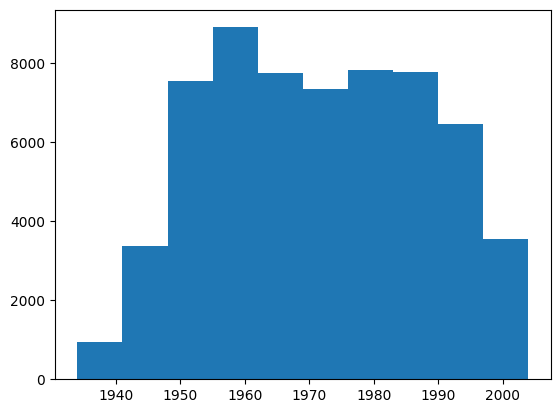

In [6]:
plt.hist(data['TBIRTH_YEAR'])

(array([ 940., 3371., 8833., 7617., 7757., 8374., 7980., 6583., 6451.,
        3547.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

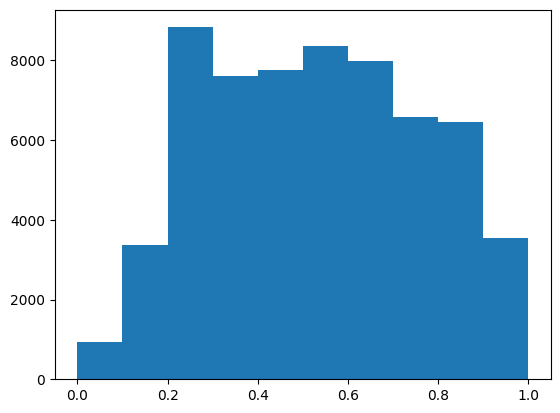

In [7]:
plt.hist(data_scaled['TBIRTH_YEAR'])

### Useful tool 2: generate random numbers

In [8]:
# generate normal random numbers
np.random.normal(loc=0.0, scale=1.0, size=(5,3)) # generate normal random variables with mean 0, std deviation 1; we want 5*3 of these and put them in an array

array([[-0.0286509 , -0.11124936, -0.17947846],
       [ 1.44843544, -0.65764322, -0.36168098],
       [-0.01490434,  0.16171063,  0.16515708],
       [ 0.7526358 , -1.8456374 ,  0.04744873],
       [-1.03038398,  0.12004528, -0.01736566]])

(array([  14.,  103.,  373.,  879., 1332., 1204.,  734.,  281.,   72.,
           8.]),
 array([-3.36705376, -2.6786504 , -1.99024703, -1.30184367, -0.6134403 ,
         0.07496306,  0.76336643,  1.45176979,  2.14017315,  2.82857652,
         3.51697988]),
 <BarContainer object of 10 artists>)

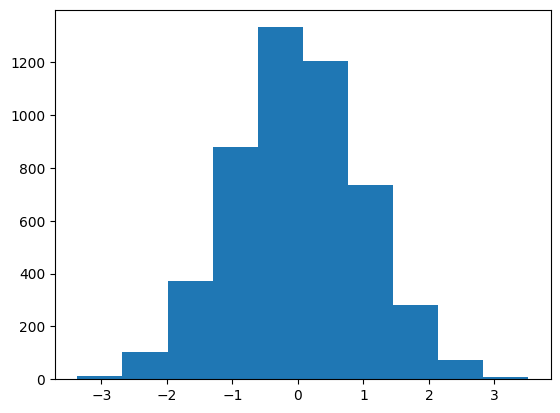

In [9]:
plt.hist(np.random.normal(loc=0.0, scale=1.0, size=(5000,1)))

In [10]:
# generate uniform random numbers
np.random.uniform(low=0.0, high=1.0, size=(5,3)) # generate uniform random variables between 0 and 1; we want 5*3 of these and put them in an array

array([[0.51054635, 0.97807627, 0.11145637],
       [0.2887301 , 0.09863708, 0.46119569],
       [0.91240854, 0.82521988, 0.41349325],
       [0.32824686, 0.03592217, 0.76818278],
       [0.62739063, 0.42938592, 0.56687596]])

(array([494., 483., 461., 541., 465., 555., 510., 467., 521., 503.]),
 array([1.02434122e-04, 1.00021132e-01, 1.99939830e-01, 2.99858528e-01,
        3.99777226e-01, 4.99695924e-01, 5.99614622e-01, 6.99533320e-01,
        7.99452018e-01, 8.99370716e-01, 9.99289414e-01]),
 <BarContainer object of 10 artists>)

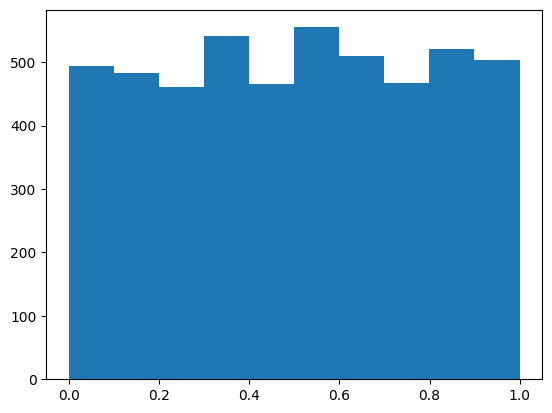

In [11]:
plt.hist(np.random.uniform(low=0.0, high=1.0, size=(5000,1)))

### Useful tool 3: accessing arrays and dataframes

In [12]:
# quick note on selecting columns (Part 1: array)
n=500
p=490
X=np.random.normal(loc=0.0, scale=1.0, size=(n,p))
X_small=X[:,0:100]

In [13]:
X_small.shape

(500, 100)

In [14]:
X_small

array([[-0.57713266,  0.65816757,  0.03137547, ...,  0.134513  ,
        -0.77527509,  1.5782897 ],
       [ 0.91734683,  1.12593876,  0.83605772, ...,  1.27904374,
         0.49742645, -0.06293083],
       [-0.16345115,  0.81574966, -0.96834795, ..., -0.29080575,
        -1.22495548,  0.50404547],
       ...,
       [ 0.45737533,  0.38090479, -1.50919349, ..., -0.11808338,
        -1.06953949,  0.11319565],
       [ 0.58207991,  0.86849095, -1.01725287, ..., -0.8472787 ,
        -0.29702945, -0.83464582],
       [ 0.07558753, -1.50077188, -1.35232108, ...,  1.39547077,
        -0.76058138, -1.88577595]])

In [15]:
# quick note on selecting columns (Part 2: dataframe)
n=500
p=490
X=np.random.normal(loc=0.0, scale=1.0, size=(n,p))
X=pd.DataFrame(X)
X_small=X.iloc[:,0:100]

In [16]:
X_small

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.315122,0.104030,-0.506236,-0.306886,-0.252894,0.302434,-1.215844,0.155838,-0.711831,1.114833,...,1.831274,1.082729,-0.715976,0.318688,-0.854154,-0.410910,0.989622,0.690241,0.607889,-0.756913
1,-0.910157,-1.051567,1.357183,0.506818,-1.637782,0.316484,-0.361535,-0.627818,-0.522426,1.823501,...,-0.147910,-0.845481,0.229317,-1.258114,1.273740,-0.500941,0.771713,0.399346,-0.004215,0.842971
2,0.470211,1.519378,-0.684291,-1.345181,1.014007,-1.021082,0.969248,-1.044197,0.676549,-1.211251,...,-0.496908,0.425361,-1.875317,0.041183,1.001671,-2.646729,-1.483491,-0.291553,0.358689,-0.166632
3,-1.096635,-0.381930,-1.096525,-0.405620,-0.299249,0.624213,-1.043866,0.347986,-1.737694,0.039959,...,0.081529,-1.568395,0.961979,1.126282,0.898144,1.411577,0.551719,1.027935,1.247023,-0.047454
4,0.104689,-0.334189,-0.845849,0.613311,0.804910,-0.022550,1.258703,0.933472,-0.522990,-1.837014,...,-0.542119,1.024566,-0.024687,-0.426919,0.889774,0.342193,-0.736742,-0.655040,0.477309,2.452765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.534187,-0.192944,-0.820516,-0.564403,-0.258552,1.434892,-1.236738,-0.084339,-0.762547,-0.370935,...,1.814439,0.606435,1.752763,-0.399660,-0.360964,1.039246,1.255387,-1.048522,0.805955,0.251362
496,-0.352674,-1.301673,1.776591,0.861437,-0.839003,-0.525162,-0.143847,0.683404,1.621896,-1.663201,...,0.038713,0.417108,-1.208613,0.171466,0.611740,0.336774,1.811518,0.006414,0.021270,2.543019
497,-0.226245,0.122264,-0.731903,0.377003,-0.833195,1.158229,-0.245788,-0.667191,0.016350,1.028102,...,0.835696,-1.073854,-0.635517,0.024975,1.416527,-1.051649,1.298381,-0.053213,-1.601421,-0.410093
498,0.199850,-0.295323,-0.443610,0.560385,-0.376808,-2.960444,1.404699,-0.008664,-0.607914,1.008079,...,-1.274092,-0.486034,-0.839630,-0.466233,-1.310600,0.286055,0.968245,0.770002,-1.086728,1.376216


In [90]:
# normalizing data

### Simulation: can we just select the best model?

In [31]:
# train a linear model (Reg1) using all the data

n=500
p=490
X=np.random.normal(loc=0.0, scale=1.0, size=(n,p))
X=pd.DataFrame(X)
y=np.random.normal(loc=0.0, scale=1.0, size=(n,1))
reg1 = LinearRegression().fit(X, y)
# print(reg.intercept_, reg.coef_, reg.score(X,y))
print('R^2 of reg1 is ',reg1.score(X,y))


R^2 of reg1 is  0.9745227458721623


In [35]:
# apply the model (reg1) on new data and check the performance (MSE)

X_new=np.random.normal(loc=0.0, scale=1.0, size=(n,p))
X_new=pd.DataFrame(X_new)
y_new=np.random.normal(loc=0.0, scale=1.0, size=(n,1))

y_pred_new=reg1.predict(X_new)
MSE_reg1=np.mean(np.square(y_new - y_pred_new))
print('MSE of reg1 is ', MSE_reg1)

MSE of reg1 is  55.31917246697322


In [46]:
# train a linear model (Reg2) using only a few features (columns)

X_small=X.iloc[:,0:100]
reg2 = LinearRegression().fit(X_small, y)
print('R^2 of reg2 is ',reg2.score(X_small,y))

R^2 of reg2 is  0.14834411575945194


In [41]:
# apply the model (reg2) on new data and check the performance (MSE)

X_new_small=X_new.iloc[:,0:100]
y_pred_new=reg2.predict(X_new_small)
MSE_reg2=np.mean(np.square(y_new - y_pred_new))
print('MSE of reg2 is ', MSE_reg2)

MSE of reg2 is  1.218510779896273


### Sample splitting

In [95]:
# split data randomly
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.4, random_state = 213)
test_y

array([[-7.04781454e-01],
       [-1.67041917e+00],
       [ 8.84023432e-01],
       [-3.94565067e-01],
       [ 2.17142384e+00],
       [ 1.90831943e+00],
       [-2.49669768e-01],
       [-7.47453343e-01],
       [-6.61832256e-01],
       [-1.80964592e+00],
       [-3.75884606e-01],
       [ 8.80895721e-02],
       [-4.51671487e-01],
       [ 2.32588360e-01],
       [-8.63529687e-01],
       [ 1.25905897e+00],
       [ 8.68707442e-01],
       [ 6.15036190e-01],
       [-3.05275040e-01],
       [ 8.91491810e-01],
       [ 2.04794806e+00],
       [-4.48545626e-01],
       [-8.76166605e-01],
       [ 1.69816338e+00],
       [ 2.12054102e-01],
       [-1.93960600e-01],
       [-5.03371265e-01],
       [-4.06872415e-01],
       [ 5.07592285e-01],
       [ 8.84989535e-02],
       [ 4.54270511e-01],
       [ 2.95863501e+00],
       [-4.01578341e-01],
       [ 1.46261845e+00],
       [-1.26932835e-01],
       [ 2.02526895e-01],
       [-7.95399657e-01],
       [-6.05935951e-02],
       [-1.7

In [96]:
reg1 = LinearRegression().fit(train_x, train_y)
# print(reg.intercept_, reg.coef_, reg.score(X,y))
print('R^2 of reg1 is ',reg1.score(train_x,train_y))
y_pred_new=reg1.predict(test_x)
MSE_reg1=np.mean(np.square(test_y - y_pred_new))
print('MSE of reg1 is ', MSE_reg1)

R^2 of reg1 is  1.0
MSE of reg1 is  2.8343995027770164


In [97]:
train_x, test_x, train_y, test_y = train_test_split(X_small, y, test_size=0.4, random_state = 213)

reg2 = LinearRegression().fit(train_x, train_y)
print('R^2 of reg2 is ',reg2.score(train_x,train_y))
y_pred_new=reg2.predict(test_x)
MSE_reg2=np.mean(np.square(test_y - y_pred_new))
print('MSE of reg2 is ', MSE_reg2)

R^2 of reg2 is  0.32107785441029857
MSE of reg2 is  1.1113013849100342


In [98]:
test_y

array([[-7.04781454e-01],
       [-1.67041917e+00],
       [ 8.84023432e-01],
       [-3.94565067e-01],
       [ 2.17142384e+00],
       [ 1.90831943e+00],
       [-2.49669768e-01],
       [-7.47453343e-01],
       [-6.61832256e-01],
       [-1.80964592e+00],
       [-3.75884606e-01],
       [ 8.80895721e-02],
       [-4.51671487e-01],
       [ 2.32588360e-01],
       [-8.63529687e-01],
       [ 1.25905897e+00],
       [ 8.68707442e-01],
       [ 6.15036190e-01],
       [-3.05275040e-01],
       [ 8.91491810e-01],
       [ 2.04794806e+00],
       [-4.48545626e-01],
       [-8.76166605e-01],
       [ 1.69816338e+00],
       [ 2.12054102e-01],
       [-1.93960600e-01],
       [-5.03371265e-01],
       [-4.06872415e-01],
       [ 5.07592285e-01],
       [ 8.84989535e-02],
       [ 4.54270511e-01],
       [ 2.95863501e+00],
       [-4.01578341e-01],
       [ 1.46261845e+00],
       [-1.26932835e-01],
       [ 2.02526895e-01],
       [-7.95399657e-01],
       [-6.05935951e-02],
       [-1.7

### Cross validation

In [108]:
#define cross-validation method to use
cv = KFold(n_splits=10, random_state=213, shuffle=True)

#build multiple linear regression model
model = LinearRegression()

#use k-fold CV to evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error',cv=cv)

#view mean square error
-np.mean(scores)



11.99091805731161

In [109]:
cv

KFold(n_splits=10, random_state=213, shuffle=True)

In [110]:
#define cross-validation method to use
cv = KFold(n_splits=10, random_state=1, shuffle=True)

#build multiple linear regression model
model = LinearRegression()

#use k-fold CV to evaluate model
scores = cross_val_score(model, X_small, y, scoring='neg_mean_squared_error',cv=cv)

#view mean square error
-np.mean(scores)


1.1567171471443838